In [1]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
from scipy import stats
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


import cf_units
import glob
import datetime
import numpy as np
import netCDF4

In [2]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0
mpy = 30.4167

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))

dt1 = datetime.datetime(1981,1,15,12,0,0)
dt2 = datetime.datetime(2015,12,16,0,0,0)


In [3]:
#for the regcm miroc5  present 1994-2014




prmiroc = glob.glob('/scratch/mkibria/vms/ICTP RegCM/MIROC5/pr/daily/pr_WAS-22_MIROC5_historical_r1i1p1_ICTP-RegCM4-7_v0_day_1994-2014.nc')
 
prmiroc.sort( )

rain_bin_mi = rain_bin 

dt1 = datetime.datetime(1994,1,1,12,0,0)
dt2 = datetime.datetime(2014,12,31,0,0,0)


for file in prmiroc:
    print(file)
    fch = netCDF4.Dataset(file)
    time = fch.variables['time'][:]
    tunits = fch.variables['time'].units
    st1 = cf_units.date2num(dt1, tunits, cf_units.CALENDAR_STANDARD)
    st2 = cf_units.date2num(dt2, tunits, cf_units.CALENDAR_STANDARD)
    itime = np.argwhere(np.logical_and(time > st1, time < st2))
    if len(itime) == 0:
        continue
    lat = fch.variables['lat'][:]
    lon = fch.variables['lon'][:]
    ipnt = np.argwhere(np.logical_and(
                       np.logical_and(lat > 18.0, lat < 28.0),
                       np.logical_and(lon > 86.0, lon < 94.0)))
    la1 = min(ipnt, key = lambda t: t[0])[0]
    la2 = max(ipnt, key = lambda t: t[0])[0]
    lo1 = min(ipnt, key = lambda t: t[1])[1]
    lo2 = max(ipnt, key = lambda t: t[1])[1]
    pr = fch.variables['pr']
    for it in itime:
        #print(it)
        data = pr[it,la1:la2,lo1:lo2] * 86400.0
        nzd = data[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_mi = rain_bin_mi + hist[0]

/scratch/mkibria/vms/ICTP RegCM/MIROC5/pr/daily/pr_WAS-22_MIROC5_historical_r1i1p1_ICTP-RegCM4-7_v0_day_1994-2014.nc


In [4]:
#for the regcm miroc5 rcp26 mid future(2041-2060)

prmirocm = glob.glob('/scratch/mkibria/vms/ICTP RegCM/MIROC5/rcp2.6/pr_WAS-22_MIROC5_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2041-2060.nc')

prmirocm.sort( )

rain_bin_mid = rain_bin 
dt1 = datetime.datetime(2041,1,1,12,0,0)
dt2 = datetime.datetime(2060,12,31,0,0,0)

for file in prmirocm:
    print(file)
    fch = netCDF4.Dataset(file)
    time = fch.variables['time'][:]
    tunits = fch.variables['time'].units
    st1 = cf_units.date2num(dt1, tunits, cf_units.CALENDAR_STANDARD)
    st2 = cf_units.date2num(dt2, tunits, cf_units.CALENDAR_STANDARD)
    itime = np.argwhere(np.logical_and(time > st1, time < st2))
    if len(itime) == 0:
        continue
    lat = fch.variables['lat'][:]
    lon = fch.variables['lon'][:]
    ipnt = np.argwhere(np.logical_and(
                       np.logical_and(lat > 18.0, lat < 28.0),
                       np.logical_and(lon > 86.0, lon < 94.0)))
    la1 = min(ipnt, key = lambda t: t[0])[0]
    la2 = max(ipnt, key = lambda t: t[0])[0]
    lo1 = min(ipnt, key = lambda t: t[1])[1]
    lo2 = max(ipnt, key = lambda t: t[1])[1]
    pr = fch.variables['pr']
    for it in itime:
        #print(it)
        data = pr[it,la1:la2,lo1:lo2] * 86400.0
        nzd = data[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_mid = rain_bin_mid + hist[0]

/scratch/mkibria/vms/ICTP RegCM/MIROC5/rcp2.6/pr_WAS-22_MIROC5_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2041-2060.nc


In [8]:
prmirocf = xr.open_dataset('/scratch/mkibria/vms/ICTP RegCM/MIROC5/rcp2.6/pr_WAS-22_MIROC5_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2081-2100.nc')
prmirocf


<xarray.Dataset>
Dimensions:    (time: 6935, bnds: 2, y: 337, x: 429)
Coordinates:
  * time       (time) object 2081-01-01 12:00:00 ... 2099-12-31 12:00:00
    lon        (y, x) float64 ...
    lat        (y, x) float64 ...
  * x          (x) float64 -5.35e+06 -5.325e+06 -5.3e+06 ... 5.325e+06 5.35e+06
  * y          (y) float64 -4.2e+06 -4.175e+06 -4.15e+06 ... 4.175e+06 4.2e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    crs        |S1 ...
    pr         (time, y, x) float32 ...
Attributes: (12/165)
    CDI:                                             Climate Data Interface v...
    Conventions:                                     CF-1.7
    history:                                         Wed Aug 03 11:20:40 2022...
    source:                                          RegCM Model output file
    institution:                                     Oak Ridge National Labor...
    project_id:                                      CORDEX
    ...                                              ...
    uwpbl_cloud_evap_entr_incr_efficiency:           15.0
    uwpbl_eddy_LS_stable_PBL_scaling:                1.5
    uwpbl_czero:                                     5.869
    uwpbl_nuk:                                       5.0
    frequency:                                       day
    CDO:                                             Climate Data Operators v...

In [5]:
#for the regcm miroc5 rcp26 far future(2081-2100)

prmirocf = glob.glob('/scratch/mkibria/vms/ICTP RegCM/MIROC5/rcp2.6/pr_WAS-22_MIROC5_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2081-2100.nc')

prmirocf.sort( )

rain_bin_mif = rain_bin 
dt1 = datetime.datetime(2081,1,1,12,0,0)
dt2 = datetime.datetime(2100,12,31,0,0,0)

for file in prmirocf:
    print(file)
    fch = netCDF4.Dataset(file)
    time = fch.variables['time'][:]
    tunits = fch.variables['time'].units
    st1 = cf_units.date2num(dt1, tunits, cf_units.CALENDAR_STANDARD)
    st2 = cf_units.date2num(dt2, tunits, cf_units.CALENDAR_STANDARD)
    itime = np.argwhere(np.logical_and(time > st1, time < st2))
    if len(itime) == 0:
        continue
    lat = fch.variables['lat'][:]
    lon = fch.variables['lon'][:]
    ipnt = np.argwhere(np.logical_and(
                       np.logical_and(lat > 18.0, lat < 28.0),
                       np.logical_and(lon > 86.0, lon < 94.0)))
    la1 = min(ipnt, key = lambda t: t[0])[0]
    la2 = max(ipnt, key = lambda t: t[0])[0]
    lo1 = min(ipnt, key = lambda t: t[1])[1]
    lo2 = max(ipnt, key = lambda t: t[1])[1]
    pr = fch.variables['pr']
    for it in itime:
        #print(it)
        data = pr[it,la1:la2,lo1:lo2] * 86400.0
        nzd = data[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_mif = rain_bin_mif + hist[0]

/scratch/mkibria/vms/ICTP RegCM/MIROC5/rcp2.6/pr_WAS-22_MIROC5_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2081-2100.nc


In [10]:
prmpi = xr.open_dataset('/scratch/mkibria/vms/ICTP RegCM/MPI-ESM-MR/pr/daily/pr_WAS-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0_daily_1994-2014.nc')


In [11]:
#for the regcm mpiesm present day 1994-2014

prmpi = glob.glob('/scratch/mkibria/vms/ICTP RegCM/MPI-ESM-MR/pr/daily/pr_WAS-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0_daily_1994-2014.nc')

prmpi.sort( )

rain_bin_mp = rain_bin 
dt1 = datetime.datetime(1994,1,1,12,0,0)
dt2 = datetime.datetime(2014,12,31,0,0,0)

for file in prmpi:
    print(file)
    fch = netCDF4.Dataset(file)
    time = fch.variables['time'][:]
    tunits = fch.variables['time'].units
    st1 = cf_units.date2num(dt1, tunits, cf_units.CALENDAR_STANDARD)
    st2 = cf_units.date2num(dt2, tunits, cf_units.CALENDAR_STANDARD)
    itime = np.argwhere(np.logical_and(time > st1, time < st2))
    if len(itime) == 0:
        continue
    lat = fch.variables['lat'][:]
    lon = fch.variables['lon'][:]
    ipnt = np.argwhere(np.logical_and(
                       np.logical_and(lat > 18.0, lat < 28.0),
                       np.logical_and(lon > 86.0, lon < 94.0)))
    la1 = min(ipnt, key = lambda t: t[0])[0]
    la2 = max(ipnt, key = lambda t: t[0])[0]
    lo1 = min(ipnt, key = lambda t: t[1])[1]
    lo2 = max(ipnt, key = lambda t: t[1])[1]
    pr = fch.variables['pr']
    for it in itime:
        #print(it)
        data = pr[it,la1:la2,lo1:lo2] * 86400.0
        nzd = data[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_mp = rain_bin_mp + hist[0]
        

/scratch/mkibria/vms/ICTP RegCM/MPI-ESM-MR/pr/daily/pr_WAS-22_MPI-M-MPI-ESM-MR_historical_r1i1p1_ICTP-RegCM4-7_v0_daily_1994-2014.nc


In [12]:
prmpim = xr.open_dataset('/scratch/mkibria/vms/ICTP RegCM/MPI-ESM-MR/rcp2.6/pr_WAS-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2041-2060.nc')


In [13]:
#for the regcm mpiesm rcp26 mid future (2041-2060)

prmpim = glob.glob('/scratch/mkibria/vms/ICTP RegCM/MPI-ESM-MR/rcp2.6/pr_WAS-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2041-2060.nc')

prmpim.sort( )

rain_bin_mpm = rain_bin 
dt1 = datetime.datetime(2041,1,1,12,0,0)
dt2 = datetime.datetime(2060,12,31,0,0,0) 

for file in prmpim:
    print(file)
    fch = netCDF4.Dataset(file)
    time = fch.variables['time'][:]
    tunits = fch.variables['time'].units
    st1 = cf_units.date2num(dt1, tunits, cf_units.CALENDAR_STANDARD)
    st2 = cf_units.date2num(dt2, tunits, cf_units.CALENDAR_STANDARD)
    itime = np.argwhere(np.logical_and(time > st1, time < st2))
    if len(itime) == 0:
        continue
    lat = fch.variables['lat'][:]
    lon = fch.variables['lon'][:]
    ipnt = np.argwhere(np.logical_and(
                       np.logical_and(lat > 18.0, lat < 28.0),
                       np.logical_and(lon > 86.0, lon < 94.0)))
    la1 = min(ipnt, key = lambda t: t[0])[0]
    la2 = max(ipnt, key = lambda t: t[0])[0]
    lo1 = min(ipnt, key = lambda t: t[1])[1]
    lo2 = max(ipnt, key = lambda t: t[1])[1]
    pr = fch.variables['pr']
    for it in itime:
        #print(it)
        data = pr[it,la1:la2,lo1:lo2] * 86400.0
        nzd = data[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_mpm = rain_bin_mpm + hist[0]
        

/scratch/mkibria/vms/ICTP RegCM/MPI-ESM-MR/rcp2.6/pr_WAS-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2041-2060.nc


In [14]:
prmpif = xr.open_dataset('/scratch/mkibria/vms/ICTP RegCM/MPI-ESM-MR/rcp2.6/pr_WAS-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2081-2100.nc')
 

In [15]:
#for the regcm mpiesm rcp26 far future (2081-2100)

prmpif = glob.glob('/scratch/mkibria/vms/ICTP RegCM/MPI-ESM-MR/rcp2.6/pr_WAS-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2081-2100.nc')

prmpif.sort( )

rain_bin_mpf = rain_bin 
dt1 = datetime.datetime(2081,1,1,12,0,0)
dt2 = datetime.datetime(2100,12,31,0,0,0) 

for file in prmpif:
    print(file)
    fch = netCDF4.Dataset(file)
    time = fch.variables['time'][:]
    tunits = fch.variables['time'].units
    st1 = cf_units.date2num(dt1, tunits, cf_units.CALENDAR_STANDARD)
    st2 = cf_units.date2num(dt2, tunits, cf_units.CALENDAR_STANDARD)
    itime = np.argwhere(np.logical_and(time > st1, time < st2))
    if len(itime) == 0:
        continue
    lat = fch.variables['lat'][:]
    lon = fch.variables['lon'][:]
    ipnt = np.argwhere(np.logical_and(
                       np.logical_and(lat > 18.0, lat < 28.0),
                       np.logical_and(lon > 86.0, lon < 94.0)))
    la1 = min(ipnt, key = lambda t: t[0])[0]
    la2 = max(ipnt, key = lambda t: t[0])[0]
    lo1 = min(ipnt, key = lambda t: t[1])[1]
    lo2 = max(ipnt, key = lambda t: t[1])[1]
    pr = fch.variables['pr']
    for it in itime:
        #print(it)
        data = pr[it,la1:la2,lo1:lo2] * 86400.0
        nzd = data[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_mpf = rain_bin_mpf + hist[0]

/scratch/mkibria/vms/ICTP RegCM/MPI-ESM-MR/rcp2.6/pr_WAS-22_MPI-M-MPI-ESM-MR_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2081-2100.nc


In [16]:
prnor = xr.open_dataset('/scratch/mkibria/vms/ICTP RegCM/NorESM1-M/pr/daily/pr_WAS-22_NCC-NORESM1-M_historical_r1i1p1_ICTP-RegCM4-7_v0_day_1994-2014.nc')


In [17]:
#for the regcm noresm present day (1994-2014)

prnor = glob.glob('/scratch/mkibria/vms/ICTP RegCM/NorESM1-M/pr/daily/pr_WAS-22_NCC-NORESM1-M_historical_r1i1p1_ICTP-RegCM4-7_v0_day_1994-2014.nc')
prnor.sort( )

rain_bin_nr = rain_bin 
dt1 = datetime.datetime(1994,1,1,12,0,0)
dt2 = datetime.datetime(2014,12,31,0,0,0)

for file in prnor:
    print(file)
    fch = netCDF4.Dataset(file)
    time = fch.variables['time'][:]
    tunits = fch.variables['time'].units
    st1 = cf_units.date2num(dt1, tunits, cf_units.CALENDAR_STANDARD)
    st2 = cf_units.date2num(dt2, tunits, cf_units.CALENDAR_STANDARD)
    itime = np.argwhere(np.logical_and(time > st1, time < st2))
    if len(itime) == 0:
        continue
    lat = fch.variables['lat'][:]
    lon = fch.variables['lon'][:]
    ipnt = np.argwhere(np.logical_and(
                       np.logical_and(lat > 18.0, lat < 28.0),
                       np.logical_and(lon > 86.0, lon < 94.0)))
    la1 = min(ipnt, key = lambda t: t[0])[0]
    la2 = max(ipnt, key = lambda t: t[0])[0]
    lo1 = min(ipnt, key = lambda t: t[1])[1]
    lo2 = max(ipnt, key = lambda t: t[1])[1]
    pr = fch.variables['pr']
    for it in itime:
        #print(it)
        data = pr[it,la1:la2,lo1:lo2] * 86400.0
        nzd = data[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_nr = rain_bin_nr + hist[0]

/scratch/mkibria/vms/ICTP RegCM/NorESM1-M/pr/daily/pr_WAS-22_NCC-NORESM1-M_historical_r1i1p1_ICTP-RegCM4-7_v0_day_1994-2014.nc


In [18]:
prnorm = xr.open_dataset('/scratch/mkibria/vms/ICTP RegCM/NorESM1-M/rcp2.6/pr_WAS-22_NCC-NORESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2041-2060.nc')


In [19]:
#for the regcm noresm rcp2.6 mid future (2041-2060)

prnorm = glob.glob('/scratch/mkibria/vms/ICTP RegCM/NorESM1-M/rcp2.6/pr_WAS-22_NCC-NORESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2041-2060.nc')
prnorm.sort( )

rain_bin_nrm = rain_bin 
dt1 = datetime.datetime(2041,1,1,12,0,0)
dt2 = datetime.datetime(2060,12,31,0,0,0)

for file in prnorm:
    print(file)
    fch = netCDF4.Dataset(file)
    time = fch.variables['time'][:]
    tunits = fch.variables['time'].units
    st1 = cf_units.date2num(dt1, tunits, cf_units.CALENDAR_STANDARD)
    st2 = cf_units.date2num(dt2, tunits, cf_units.CALENDAR_STANDARD)
    itime = np.argwhere(np.logical_and(time > st1, time < st2))
    if len(itime) == 0:
        continue
    lat = fch.variables['lat'][:]
    lon = fch.variables['lon'][:]
    ipnt = np.argwhere(np.logical_and(
                       np.logical_and(lat > 18.0, lat < 28.0),
                       np.logical_and(lon > 86.0, lon < 94.0)))
    la1 = min(ipnt, key = lambda t: t[0])[0]
    la2 = max(ipnt, key = lambda t: t[0])[0]
    lo1 = min(ipnt, key = lambda t: t[1])[1]
    lo2 = max(ipnt, key = lambda t: t[1])[1]
    pr = fch.variables['pr']
    for it in itime:
        #print(it)
        data = pr[it,la1:la2,lo1:lo2] * 86400.0
        nzd = data[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_nrm = rain_bin_nrm + hist[0]


/scratch/mkibria/vms/ICTP RegCM/NorESM1-M/rcp2.6/pr_WAS-22_NCC-NORESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2041-2060.nc


In [20]:
prnorf = xr.open_dataset('/scratch/mkibria/vms/ICTP RegCM/NorESM1-M/rcp2.6/pr_WAS-22_NCC-NORESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2081-2100.nc')


In [21]:
#for the regcm noresm rcp2.6 far future (2081-2100)

prnorf = glob.glob('/scratch/mkibria/vms/ICTP RegCM/NorESM1-M/rcp2.6/pr_WAS-22_NCC-NORESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2081-2100.nc')
prnorf.sort( )

rain_bin_nrf = rain_bin 
dt1 = datetime.datetime(2081,1,1,12,0,0)
dt2 = datetime.datetime(2100,12,31,0,0,0)

for file in prnorf:
    print(file)
    fch = netCDF4.Dataset(file)
    time = fch.variables['time'][:]
    tunits = fch.variables['time'].units
    st1 = cf_units.date2num(dt1, tunits, cf_units.CALENDAR_STANDARD)
    st2 = cf_units.date2num(dt2, tunits, cf_units.CALENDAR_STANDARD)
    itime = np.argwhere(np.logical_and(time > st1, time < st2))
    if len(itime) == 0:
        continue
    lat = fch.variables['lat'][:]
    lon = fch.variables['lon'][:]
    ipnt = np.argwhere(np.logical_and(
                       np.logical_and(lat > 18.0, lat < 28.0),
                       np.logical_and(lon > 86.0, lon < 94.0)))
    la1 = min(ipnt, key = lambda t: t[0])[0]
    la2 = max(ipnt, key = lambda t: t[0])[0]
    lo1 = min(ipnt, key = lambda t: t[1])[1]
    lo2 = max(ipnt, key = lambda t: t[1])[1]
    pr = fch.variables['pr']
    for it in itime:
        #print(it)
        data = pr[it,la1:la2,lo1:lo2] * 86400.0
        nzd = data[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin_nrf = rain_bin_nrf + hist[0]


/scratch/mkibria/vms/ICTP RegCM/NorESM1-M/rcp2.6/pr_WAS-22_NCC-NORESM1-M_rcp26_r1i1p1_ICTP-RegCM4-7_v0_day_2081-2100.nc


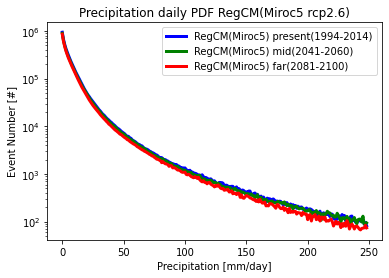

In [6]:
#ploting miroc5 rcp26

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#plt.plot(rain_bin_ch, 'bo',label='CHIRPS')
#plt.plot(rain_bin_t, 'ko',label='TRMM')
plt.plot(rain_bin_mi, 'b',label='RegCM(Miroc5) present(1994-2014)',linewidth = 3)
plt.plot(rain_bin_mid, 'g',label='RegCM(Miroc5) mid(2041-2060)',linewidth = 3)
plt.plot(rain_bin_mif, 'r',label='RegCM(Miroc5) far(2081-2100)',linewidth = 3)

plt.legend()


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF RegCM(Miroc5 rcp2.6)')
plt.savefig("/scratch/mkibria/vms/pdf_regcm_rcp2.6_miroc5.png")



plt.show( )

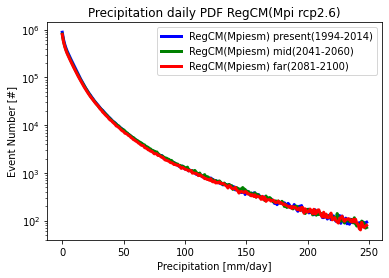

In [23]:
#ploting mpiesm rcp2.6


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(rain_bin_mp, 'b',label='RegCM(Mpiesm) present(1994-2014)',linewidth = 3)
plt.plot(rain_bin_mpm, 'g',label='RegCM(Mpiesm) mid(2041-2060)',linewidth = 3)
plt.plot(rain_bin_mpf, 'r',label='RegCM(Mpiesm) far(2081-2100)',linewidth = 3)
plt.legend()


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF RegCM(Mpi rcp2.6)')
plt.savefig("/scratch/mkibria/vms/pdf_regcm_rcp2.6_mpiesm.png")



plt.show( )

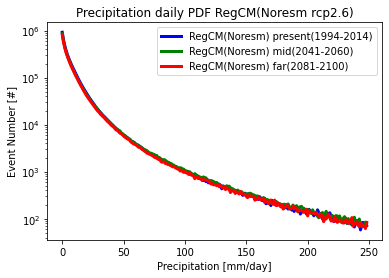

In [24]:
#ploting noresm rcp2.6

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
 
plt.plot(rain_bin_nr, 'b',label='RegCM(Noresm) present(1994-2014)',linewidth = 3)
plt.plot(rain_bin_nrm, 'g',label='RegCM(Noresm) mid(2041-2060)',linewidth = 3)
plt.plot(rain_bin_nrf, 'r',label='RegCM(Noresm) far(2081-2100)',linewidth = 3)

plt.legend()


ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF RegCM(Noresm rcp2.6)')
plt.savefig("/scratch/mkibria/vms/pdf_regcm_rcp2.6_noresm.png")



plt.show( )